# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


#@ Part 1

In [4]:
#Finding if we can see any linear relationship btw "Mileage" and "Price".
df[['Mileage','Price']].describe()

,Mileage,Price
count,804.000000,804.000000
mean,19831.934080,21343.143767
std,8196.319707,9884.852801
min,266.000000,8638.930895
25%,14623.500000,14273.073870
50%,20913.500000,18024.995019
75%,25213.000000,26717.316636
max,50387.000000,70755.466717


,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


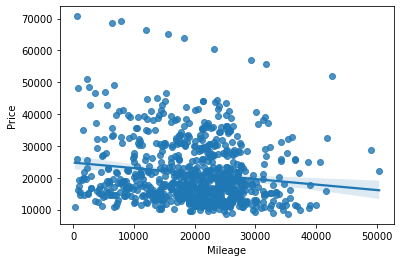

In [5]:
import seaborn as sns
sns.regplot(x = 'Mileage',
            y = "Price",
            data = df[["Mileage","Price"]])
df[["Mileage","Price"]].corr()
#There is not much correlation btw "Mileage" and "Price" ,To apply linear regression model.


In [6]:
#Even though there is no significant correlation ,let's try linear regression model.
X = df.loc[:,["Mileage"]].values
y = df.loc[:,"Price"].values
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X ,y ,test_size = 0.2)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [8]:
#Validating the model if it is best as per the requirment
y_pred = regressor.predict(X_test)


In [9]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
"""
WE CAN'T PREDICT PRICE OF A CAR USING MILEAGE OF THAT CAR
BECAUSE WE HAVE WORST R2 - SCORE ,BASICALLY IT HAS TO BE MORE THAN 0.5
"""

R2- SCORE: 0.021630361996889946


"\nWE CAN'T PREDICT PRICE OF A CAR USING MILEAGE OF THAT CAR\nBECAUSE WE HAVE WORST R2 - SCORE ,BASICALLY IT HAS TO BE MORE THAN 0.5\n"

#@ Part 2 

In [10]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


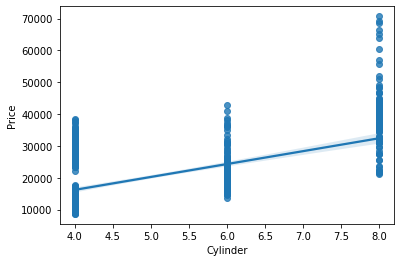

In [11]:
#Finding relation btw "Cylinder" and "Price"
sns.regplot(x = "Cylinder",
            y = "Price",
            data = df[["Cylinder","Price"]])
df[["Cylinder","Price"]].corr()
# There is good correlation
# we can go further on creating linear model.


,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


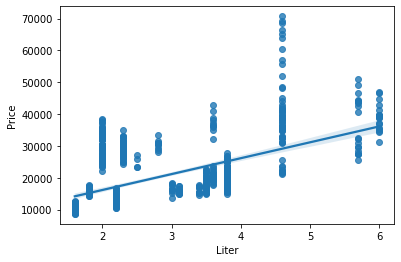

In [12]:
sns.regplot(x = "Liter",
            y = "Price",
            data = df[["Liter","Price"]])
df[["Liter","Price"]].corr()
# There is good correlation
# we can go further on creating linear model.

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


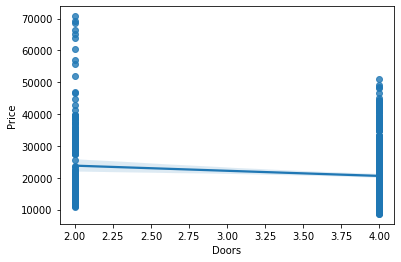

In [13]:
sns.regplot(x = "Doors",
            y = "Price",
            data = df[["Doors","Price"]])
df[["Doors","Price"]].corr()
#There is no correlation 
# It may not give us a good result in linear regression.

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


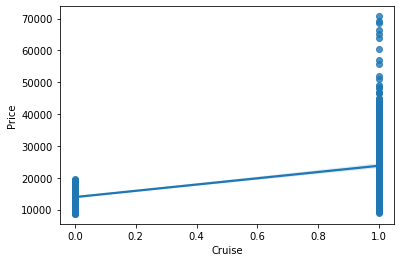

In [14]:
sns.regplot(x = "Cruise",
            y = "Price",
            data = df[['Cruise','Price']])
df[["Cruise","Price"]].corr()
#There is no correlation 
# It may not give us a good result in linear regression.

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


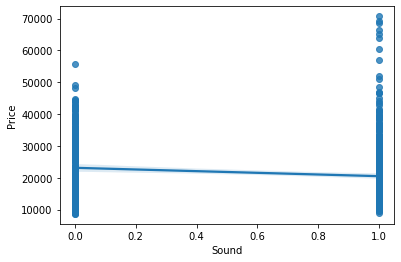

In [15]:
sns.regplot(x = "Sound",
            y = "Price",
            data = df[["Sound","Price"]])
df[["Sound","Price"]].corr()
#There is no correlation 
# It may not give us a good result in linear regression.

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


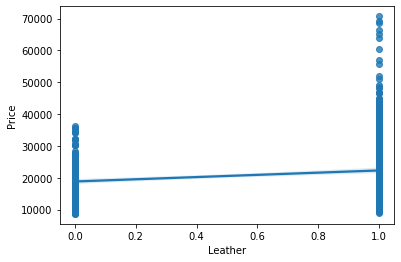

In [16]:
sns.regplot(x = "Leather",
            y = "Price",
            data = df[["Leather","Price"]])
df[["Leather","Price"]].corr()

In [17]:
#mileage, cylinders, liters, doors, cruise, sound, and leather
X = df[["Mileage","Cylinder","Liter","Doors","Cruise","Leather"]].values
y = df["Price"].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [18]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
# It seems it is not a good model for linear regression.

R2- SCORE: 0.47880237166904416


In [19]:
"""
SELECTING GOOD FEATURE FOR LINEAR REGRESSSION.
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(["Mileage","Cylinder","Liter","Doors","Cruise","Leather"],sfs.get_support())))

[('Mileage', False), ('Cylinder', True), ('Liter', False), ('Doors', False), ('Cruise', True), ('Leather', False)]


In [21]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(["Mileage","Cylinder","Liter","Doors","Cruise","Leather"],selector.support_))

[('Mileage', False),
 ('Cylinder', True),
 ('Liter', False),
 ('Doors', False),
 ('Cruise', True),
 ('Leather', True)]

In [22]:
#["Cylinder","Doors","Cruise"]
X = df[["Cylinder","Doors","Cruise"]].values
y = df["Price"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [23]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
# Atleast ["Cylinder","Doors","Cruise"] these features have gave a good model for linear regression. 

R2- SCORE: 0.4796799276562883


#@ Part 3

In [24]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [25]:
#getting dummies ["Make",]
X = pd.get_dummies(df[["Make","Model","Type"]]).values
y = df['Price']
X_train ,X_test ,y_train ,y_test = train_test_split(X ,y ,test_size = 0.2)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
#WE HAVE GOT A GOOD R2 -SCORE IN THIS LINEAR REGRESSION MODEL
# SO WE CAN CONSIDER ALL THE FEATURES TO BE A GOOD FIT FOR PREDICTIING "PRICE" USING LINEAR REGRESSION MODEL

R2- SCORE: 0.9438877204858227
